In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix
from joblib import dump

In [30]:
df=pd.read_csv('/content/Dry_Bean_Dataset.csv')
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore

# Convert 'Class' column to numerical representation if it contains categorical data
df['Class_Numeric'] = df['Class'].astype('category').cat.codes

# Calculate correlation matrix excluding non-numerical columns
corr_matrix = df.select_dtypes(include=['number']).corr()

In [31]:
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class,Class_Numeric
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER,5
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER,5
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON,3
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON,3
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON,3
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON,3


In [32]:
df.shape

(13611, 18)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
 17  Class_Numeri

In [34]:
df.isna().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
Class_Numeric      0
dtype: int64

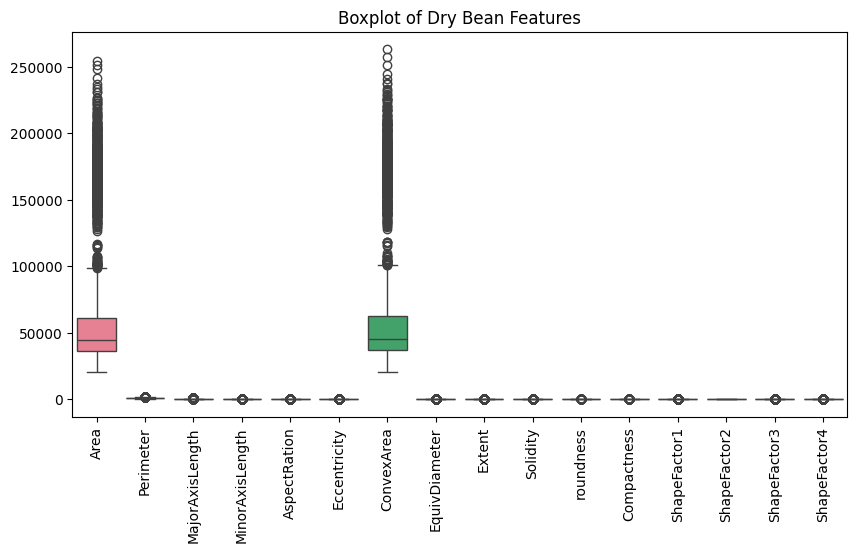

In [35]:
indicators=['Area','Perimeter','MajorAxisLength','MinorAxisLength','AspectRation','Eccentricity','ConvexArea','EquivDiameter','Extent','Solidity','roundness','Compactness','ShapeFactor1','ShapeFactor2','ShapeFactor3','ShapeFactor4']
plt.figure(figsize=(10,5))
sns.boxplot(data=df[indicators])
plt.title("Boxplot of Dry Bean Features")
plt.xticks(rotation=90)
plt.show()

<Axes: ylabel='Area'>

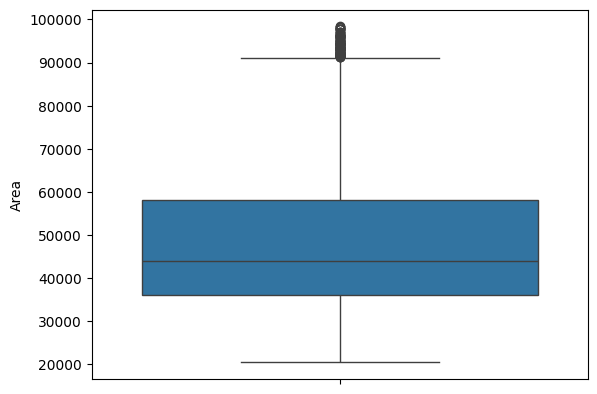

In [36]:
q1 = df.Area.quantile(.25)
q3 = df.Area.quantile(.75)
IQR = q3 - q1
upper_limit = q3+1.5*IQR
lower_limit = q1-1.5*IQR
df =df[df.Area<upper_limit]
sns.boxplot(df.Area)

<Axes: ylabel='Area'>

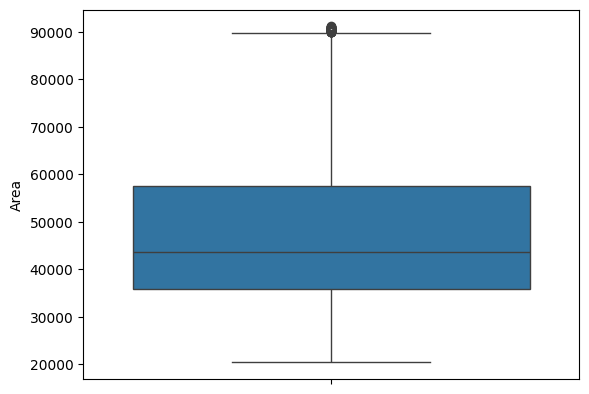

In [37]:
q1 = df.Area.quantile(.25)
q3 = df.Area.quantile(.75)
IQR = q3 - q1
upper_limit = q3+1.5*IQR
lower_limit = q1+1.5*IQR
df = df[df.Area<upper_limit]
sns.boxplot(df.Area)

<Axes: ylabel='ConvexArea'>

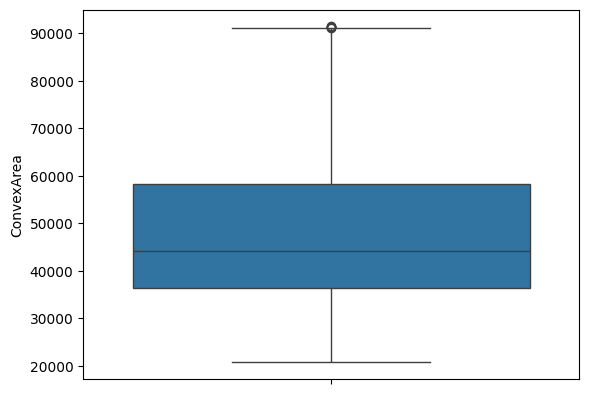

In [38]:
q1  = df.ConvexArea.quantile(.25)
q3 = df.ConvexArea.quantile(.75)
IQR = q3 - q1
upper_limit = q3+1.5*IQR
lower_limit = q1-1.5*IQR
df = df[df.ConvexArea<upper_limit]
sns.boxplot(df.ConvexArea)

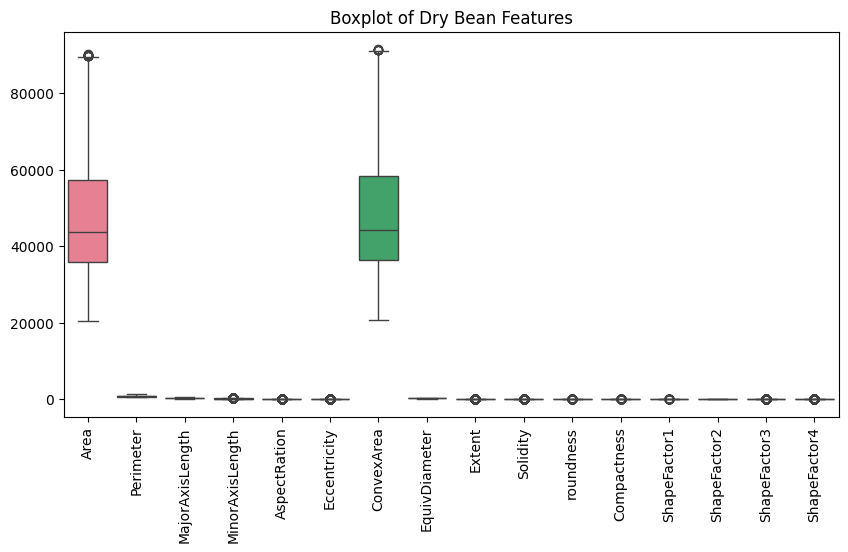

In [39]:
indicators = ['Area','Perimeter','MajorAxisLength','MinorAxisLength','AspectRation','Eccentricity','ConvexArea','EquivDiameter','Extent','Solidity','roundness','Compactness','ShapeFactor1','ShapeFactor2','ShapeFactor3','ShapeFactor4']
plt.figure(figsize=(10,5))
sns.boxplot(data=df[indicators])
plt.title("Boxplot of Dry Bean Features")
plt.xticks(rotation=90)
plt.show()

In [40]:
df.describe(include="all")

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class,Class_Numeric
count,12934.000000,12934.000000,12934.000000,12934.000000,12934.000000,12934.000000,12934.000000,12934.000000,12934.000000,12934.000000,12934.000000,12934.000000,12934.000000,12934.000000,12934.000000,12934.000000,12934,12934.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DERMASON,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3546,NaN
mean,47679.712695,821.609271,307.496913,194.525583,1.581764,0.749470,48324.716329,243.208630,0.748594,0.987191,0.874204,0.800567,0.006711,0.001759,0.644849,0.995237,NaN,3.660043
std,15711.661197,153.703140,64.953076,28.212878,0.251235,0.093657,16016.916049,39.463635,0.049215,0.004605,0.060378,0.062786,0.000940,0.000578,0.100704,0.004283,NaN,1.783673
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.004241,0.000751,0.410339,0.947687,NaN,0.000000
25%,35902.250000,699.271750,251.560961,174.717207,1.426335,0.713066,36317.750000,213.804033,0.717352,0.985765,0.830929,0.762441,0.006093,0.001217,0.581316,0.993991,NaN,3.000000
50%,43692.500000,784.225000,291.857544,191.049028,1.547315,0.763100,44201.500000,235.862288,0.758600,0.988306,0.885686,0.802403,0.006693,0.001741,0.643851,0.996524,NaN,4.000000
75%,57351.750000,946.790750,367.346394,209.798897,1.707675,0.810606,58238.500000,270.226786,0.785974,0.990006,0.918438,0.835795,0.007320,0.002200,0.698553,0.997944,NaN,5.000000


<ipython-input-41-6a3af279028a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Extent)


<Axes: xlabel='Extent', ylabel='Density'>

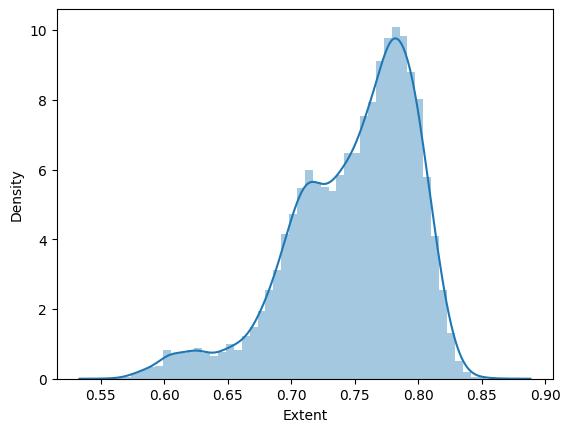

In [41]:
import seaborn as sns # type: ignore
sns.distplot(df.Extent)

<Axes: xlabel='Class', ylabel='count'>

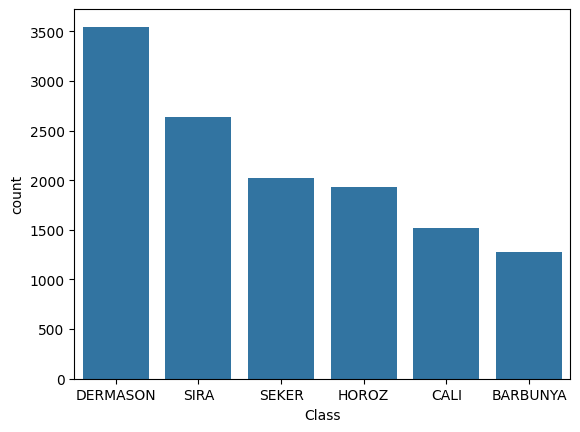

In [42]:
sns.barplot(x=df.Class.value_counts().index,y=df.Class.value_counts())

<Axes: xlabel='MinorAxisLength', ylabel='MajorAxisLength'>

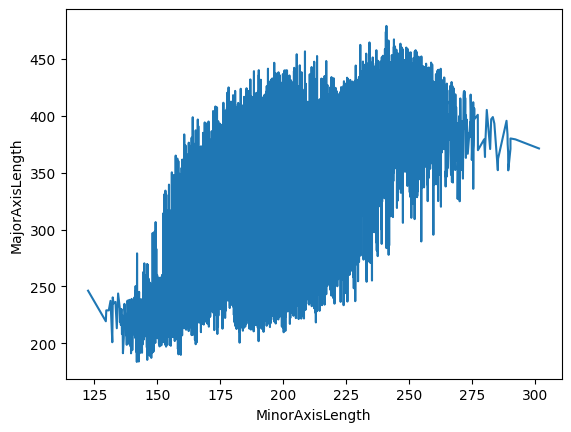

In [43]:
sns.lineplot(x=df.MinorAxisLength,y=df.MajorAxisLength)

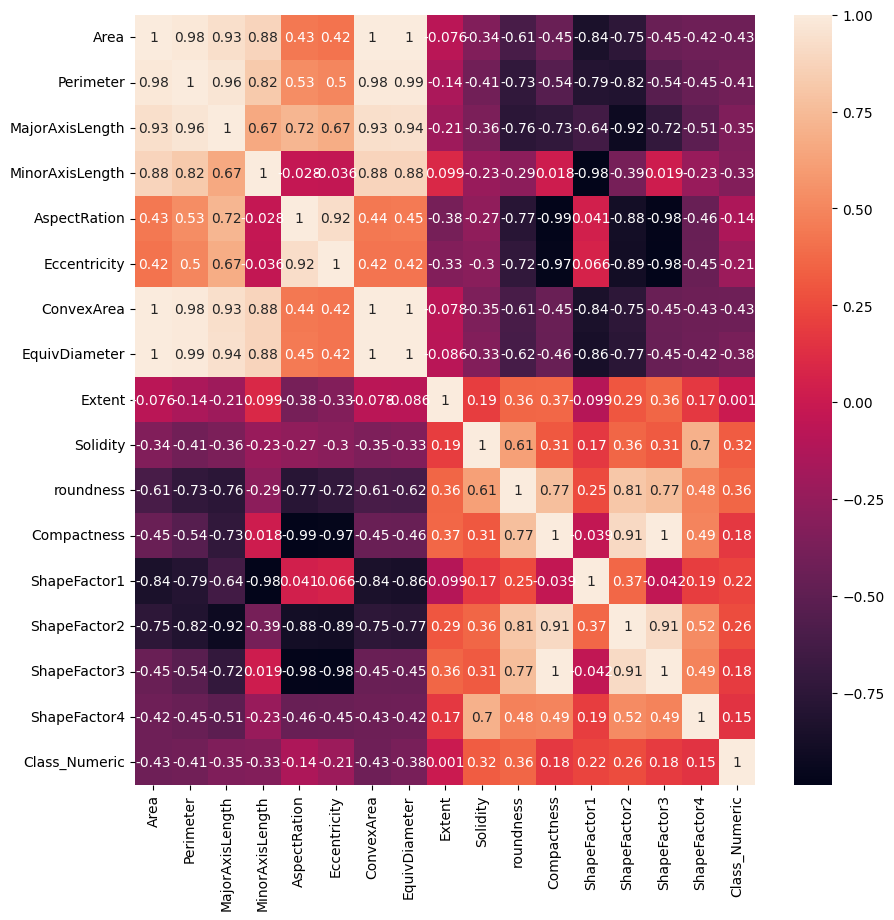

In [44]:
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore

df['Class_Numeric'] = df['Class'].astype('category').cat.codes

corr_matrix = df.select_dtypes(include=['number']).corr()

plt.figure(figsize = (10, 10))
sns.heatmap(corr_matrix, annot = True)
plt.show()

In [45]:
df['Class'].unique()

array(['SEKER', 'BARBUNYA', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [46]:
me={"SEKER":0,"BARBUNYA":1,"BOMBAY":2,"CALI":3,"HOROZ":4,"SIRA":5,"DERMASON":6}

In [47]:
df["Class"]

0           SEKER
1           SEKER
2           SEKER
3           SEKER
4           SEKER
           ...   
13606    DERMASON
13607    DERMASON
13608    DERMASON
13609    DERMASON
13610    DERMASON
Name: Class, Length: 12934, dtype: object

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x=df.iloc[:,0:16]
x.head(5)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166


In [50]:
y=df['Class']
y.head(5)

0    SEKER
1    SEKER
2    SEKER
3    SEKER
4    SEKER
Name: Class, dtype: object

In [51]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [52]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((10347, 16), (2587, 16), (10347,), (2587,))

In [53]:
from sklearn.linear_model import  LinearRegression

In [54]:
model1=LogisticRegression()

In [55]:
model1.fit(xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [56]:
ypred=model1.predict(xtest)

In [57]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report,confusion_matrix

In [58]:
accuracy1=accuracy_score(ytest,ypred)
precision1=precision_score(ytest,ypred,average="weighted")
recall1=recall_score(ytest,ypred,average="weighted")
conf1=confusion_matrix(ytest,ypred)
classrep1=classification_report(ytest,ypred)

accuracy1,precision1,recall1,conf1,classrep1


(0.7255508310784693,
 0.7230528629995426,
 0.7255508310784693,
 array([[154,  79,   0,  32,   0,   6],
        [ 73, 226,   0,  16,   0,   4],
        [  0,   0, 590,   2,  40,  46],
        [ 16,   8,  16, 266,   2,  60],
        [  3,   0,  79,   1, 267,  58],
        [  1,   0,  31,  62,  75, 374]]),
 '              precision    recall  f1-score   support\n\n    BARBUNYA       0.62      0.57      0.59       271\n        CALI       0.72      0.71      0.72       319\n    DERMASON       0.82      0.87      0.85       678\n       HOROZ       0.70      0.72      0.71       368\n       SEKER       0.70      0.65      0.67       408\n        SIRA       0.68      0.69      0.69       543\n\n    accuracy                           0.73      2587\n   macro avg       0.71      0.70      0.70      2587\nweighted avg       0.72      0.73      0.72      2587\n')

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
model2=DecisionTreeClassifier()

In [61]:
model2.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [62]:
ypred=model2.predict(xtest)

In [63]:
accuracy2=accuracy_score(ytest,ypred)
precision2=precision_score(ytest,ypred,average="weighted")
recall2=recall_score(ytest,ypred,average="weighted")
conf2=confusion_matrix(ytest,ypred)
classrep2=classification_report(ytest,ypred)

accuracy2,precision2,recall2,conf2,classrep2

(0.8770776961731735,
 0.8775105047075031,
 0.8770776961731735,
 array([[238,  22,   0,   3,   3,   5],
        [ 31, 272,   0,  10,   1,   5],
        [  0,   0, 599,   6,   9,  64],
        [  7,  11,   5, 338,   0,   7],
        [  1,   0,  24,   0, 372,  11],
        [  6,   1,  59,  15,  12, 450]]),
 '              precision    recall  f1-score   support\n\n    BARBUNYA       0.84      0.88      0.86       271\n        CALI       0.89      0.85      0.87       319\n    DERMASON       0.87      0.88      0.88       678\n       HOROZ       0.91      0.92      0.91       368\n       SEKER       0.94      0.91      0.92       408\n        SIRA       0.83      0.83      0.83       543\n\n    accuracy                           0.88      2587\n   macro avg       0.88      0.88      0.88      2587\nweighted avg       0.88      0.88      0.88      2587\n')

In [64]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier()
model3.fit(xtrain,ytrain)

RandomForestClassifier()

In [65]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
ypred = model3.predict(xtest)
accuracy = accuracy_score(ytest, ypred)
precision = precision_score(ytest, ypred,average="weighted")
recall = recall_score(ytest, ypred,average="weighted")
f1 = f1_score(ytest, ypred,average="weighted")
confusion = confusion_matrix(ytest, ypred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", confusion)

Accuracy: 0.9103208349439506
Precision: 0.9106093838654464
Recall: 0.9103208349439506
F1 Score: 0.9103623413161449
Confusion Matrix:
 [[245  19   0   1   2   4]
 [ 14 291   0   9   1   4]
 [  0   0 626   1   6  45]
 [  3  11   2 346   0   6]
 [  2   0  14   0 381  11]
 [  4   1  57   9   6 466]]


In [66]:
ypred_t=model2.predict(xtrain)
acc2=accuracy_score(ytrain,ypred_t)
acc2


1.0

In [67]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [68]:
param_grid = {
     'n_estimators': [100, 200, 300],
     'max_depth': [10, 20, 30, None],
     'min_samples_split': [2, 5, 10],
     'min_samples_leaf': [1, 2, 4],
     'max_features': ['auto', 'sqrt', 'log2']
}

param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming 'xtrain' and 'ytrain' are your training data
clf_tuned = RandomForestClassifier()  # Initialize the model
clf_tuned.fit(xtrain, ytrain)          # Train the model

ypred_train = clf_tuned.predict(xtrain)  # Now you can make predictions
acc = accuracy_score(ytrain, ypred_train)
print(acc)

1.0


In [74]:
import pickle
with open('clf.pkl','wb') as f:
  pickle.dump(clf_tuned, f)

In [71]:
import numpy as np
import pickle
import pandas as pd
import os
from flask import  Flask, request, render_template